In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../../kiva_loans.csv")

In [4]:
df.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01


In [5]:
df['region'] = df.region.fillna('Unknow_Region')
# p = df[(df.country == 'Philippines') & (df.region == 'Unknow_Region')]


In [6]:
themes = pd.read_csv('../../loan_theme_ids.csv')

In [7]:
merger = pd.merge(df, themes, on='id')


In [8]:
p = merger[(merger.country == 'Philippines') & (merger.region != 'Unknow_Region')]

In [9]:
r = p.groupby('region')[['loan_amount']].sum().sort_values('loan_amount', ascending=False).reset_index().head(20)
r.head(1)

,region,loan_amount
0,"Narra, Palawan",1235750.0


In [10]:
p.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,Loan Theme ID,Loan Theme Type,Partner ID
46,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,...,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02,a1050000000wf0Y,General,126.0
47,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,...,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02,a1050000000wf0q,General,145.0


In [11]:
# Create a dataframe called sector, that contains the sum of the 
# funded amount group by the sector
# Sorted from the highest amount
# Display the head
sector = p.groupby('sector').funded_amount.sum().reset_index().sort_values('funded_amount', ascending=False)

In [25]:
p.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,Loan Theme ID,Loan Theme Type,Partner ID
46,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,...,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02,a1050000000wf0Y,General,126.0


In [35]:
plt.tight_layout(h_pad=1.5)

<Figure size 640x480 with 0 Axes>

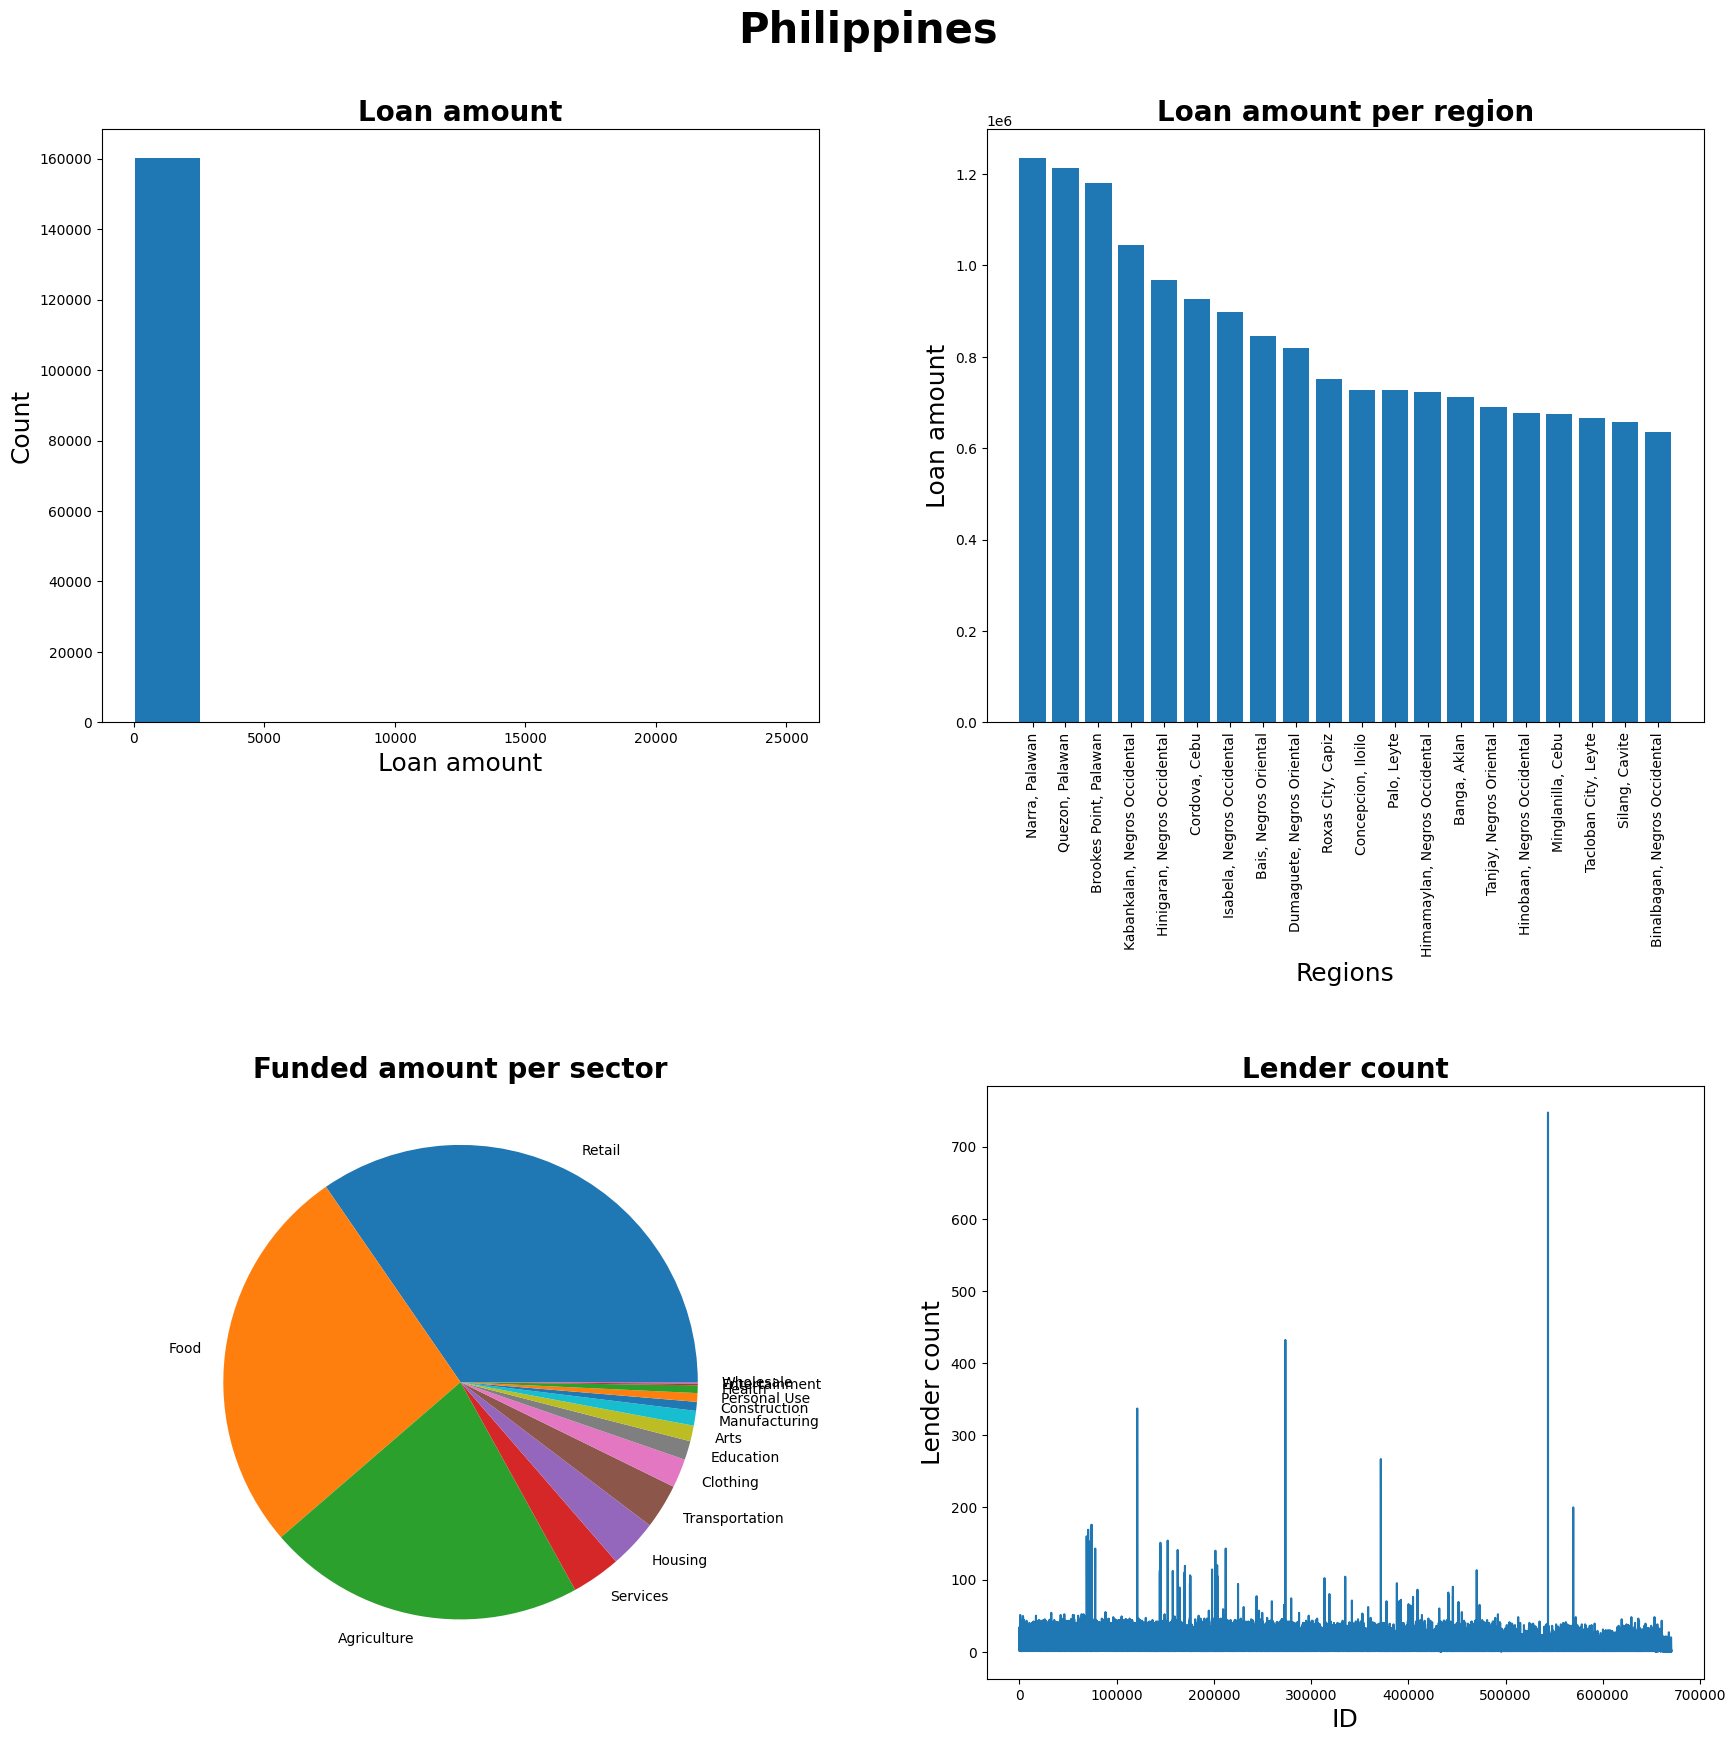

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(18,18))
fig.suptitle('Philippines', fontsize=30, fontweight='bold')
axes[0][0].hist(p.loan_amount)
axes[0][0].set_xlabel('Loan amount', fontsize=18)
axes[0][0].set_ylabel('Count', fontsize=18)
axes[0][0].set_title('Loan amount', fontsize=20, fontweight='bold')

axes[0][1].bar(r.region, r.loan_amount)
axes[0][1].set_xticks(r.region)
axes[0][1].set_xticklabels(r.region, rotation=90);
axes[0][1].set_xlabel('Regions', fontsize=18)
axes[0][1].set_ylabel('Loan amount', fontsize=18)
axes[0][1].set_title('Loan amount per region', fontsize=20, fontweight='bold')

axes[1][0].pie(sector.funded_amount, labels=sector.sector)
axes[1][0].set_title('Funded amount per sector', fontsize=20, fontweight='bold')

axes[1][1].plot(p['lender_count'])
axes[1][1].set_title('Lender count', fontsize=20, fontweight='bold')
axes[1][1].set_xlabel('ID', fontsize=18)
axes[1][1].set_ylabel('Lender count', fontsize=18)
plt.tight_layout(pad=3, h_pad=5)


In [ ]:
plt.figure(figsize=(18,18));
plt.suptitle('Philippines', fontsize=30, fontweight='bold')
plt.subplot(2,2,1)
plt.hist(p.loan_amount)
plt.xlabel('Loan amount', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Loan amount', fontsize=20, fontweight='bold')

plt.subplot(2,2,2)
plt.bar(r.region, r.loan_amount)
plt.xticks(r.region, rotation=90)
plt.xlabel('Regions', fontsize=18)
plt.ylabel('Loan amount', fontsize=18)
plt.title('Loan amount per region', fontsize=20, fontweight='bold')

plt.subplot(2,2,3)
plt.pie(sector.funded_amount, labels=sector.sector)
plt.title('Funded amount per sector', fontsize=20, fontweight='bold')


plt.subplot(2,2,4)
plt.plot(p['lender_count'])
plt.title('Lender count', fontsize=20, fontweight='bold')
plt.xlabel('ID', fontsize=18)
plt.ylabel('Lender count', fontsize=18)
plt.tight_layout(pad=3, h_pad=5)
